<h7>
Jeff Becker # 200182924 <br>
U of L Goldsmiths <br>
BSc <br>
CM2015 Programming With Data<br>
Midterm Assignment Fall 2022<br>

</h7>
<br>
<br>


<h1> Negative Bias in Online Media Organtization Headlines. </h1>


**Thesis:**
Do online news media organizations have an overall negative bias in the presentation of content to consumers? That is the question that this research will attempt to answer.  I will examine news headlines  and attempt to determine if there is an overall bias towards negative content. 

There are various theories as to why a news media organization would exhibit negative bias. Those reasons may include an intentional attempt to encourage engagement by displaying salacious or scandalous content(“clickbait”), unconscious bias towards negativity, political and socially motivated activism, over emphasis on content which is inherently negative, or that newsworthy stories tend to be more negative than positive. The reasons why this occurs are beyond the scope of this project. Rather, I will ask the question: Is there a tendency for a negative bias in news media reporting and attempt to answer that question with scraped data from contemporary online news media organizations.

**Background:**
There are a multitude of  reasons for the psychological, sociological and physiological motivators regarding a preference for consuming more negative content rather than neutral or positive content. Some theories include the evolutionary component of human survival mechanisms. According to Soroka, Fournier, and Nir a human’s vigilance and attention to potentially threatening elements is neurologically “hardwired (Soroka et al.).

There also may be differences based on environmental factors such as culture, religion, political paradigms, etc. Soroka, Fournier, and Nir’s study, in which they examined people’s psychophysiological reactions to video news content in 17 countries revealed that, globally, humans are more aroused by and attentive to negative news on average (Soroka et al.).

**Abstract:**
The reasons for news media bias have been extensively studied. These studies involve large data sets, self reporting of respondents and samples of content. The scope of these studies and their implications is vast. This project is not an explainer for sociological or psychological phenomena regarding negative news media bias. Rather, this is a small scale, limited research project only to demonstrate that contemporary news media organizations do in fact have an overall negative bias in their reporting.

Why is negative bias of concern? There is research demonstrating that consumption of negative news media can have negative health consequences (Kathirvel). Therefore, the study of negative bias in the news media is a valid public health concern. There is already a significant mental health decline in the post COVID 19 pandemic world (Lindberg). It is important to consider how news media reporting affects mental health and how news media reporting continues to inform overall sentiment, attitudes and outlook among world citizens.


**Methodology:**
Bias has a number of definitions, however, for the purpose of this research I will adhere to this definition: cause to feel or show inclination or prejudice for or against someone or something. In this instance the inclination is towards negativity. Negativity can be defined a variety of ways but, in the context of sentiment, negativity is pessimism, skepticism and disagreeableness.

It is important that the tools used to score negativity should match the overall definition of negativity. The tools used in this instance is from the Python NLTK library : VADER - Valence Aware Dictionary for sEntiment Reasoning.

Why VADER? VADER has shown good performance with classification accuracy (F1 scores) and in some instances can outperform more sophisticated sentiment analysis tools and even human beings (Hutto and Gilbert).  Additionally VADER does not require training data like some other classifiers which saves time and resources for equally valid results.

Additionally, I’ll use the Textblob library to score subjectivity. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.  While this does not necessarily correlate to negative bias, it can inform the level of personal opinion injected into the statement which can be then compared to the relative level of negative bias. 


The data will be scraped from news media organizations websites. Because of limitations on the amount of data, the scraped data will be the headlines only. Since headlines are intended to encourage engagement, I believe that the headline is a fair indicator of the overall sentiment of the content of the article.

Many headline data uses HTML tags of h1, h2, h3, etc. Because it’s not possible to know without inspecting the div tags of the website, it is an evaluation that has to be made by the researcher. For instance, the website CNN uses class id div tags which can be difficult to scrape without making custom Xpath queries. Creating a special scraper for one site that does not work on other sites may capture data inconsistently. For that reason I will limit the scope to sites that can be scraped for headlines using h1 tags.

I will attempt to keep an even distribution of the types of news sites, based on reputation, so that the types of political and social bias is not focused in one direction. For example, Fox News is notoriously conservative whereas the Guardian US is often regarded as left leaning. I will scrape both of these sites to create a balanced approach. Other sites explored will be the NY Post, the New York Times, the Daily Mail, BBC, along with two of my local news sites, KPTV and Oregonlive. There may be some stylistic variation between traditional news sites and tabloid style news. The Daily Mail is known to have tabloid style reporting whereas the New York Times is known for traditional, in-depth reporting. Based on these distinctions, I'll attempt to answer the question of: is there a difference in the negativity based on the style of reporting? 

Each of these scraped sites will receive their own discrete data set which will be labeled and worked with until the conclusion. The raw scrape will be preserved so that it can be reviewed with other sentiment analyzers to compare the accuracy of the results at a later date, should one choose to do so.

At the end of the document I’ll offer a ranking of which news organizations exhibited the most negative bias based on the above methodology.

**Limitations:**
As stated, the scraper that I have developed only scrapes HTML “h” tags. It is possible that news organizations websites that were not scraped could exhibit less, equal or more bias. My selection of news organizations to scrape is not scientific and may be subject to my own personal bias. The depth and breadth of the project is limited and relies on the operator to select the appropriate website. 

Punctuation and digits are eliminated with regex expressions. This may have implications for sentiment analysis. VADER is trained to score punctuation, capitalization and emojis. However when analyzing headlines, emojis are seldom used and punctuation is often skipped due to the style of headline writing. Case is retained for sentiment scoring but not the frequency plots. 

The data scraped is lemmatized, not stemmed at the tokenization step. The Porter, Snowball and Lancaster stemmers created too many useless words. For a large machine learning dataset, generalized data is appropriate. For the limited amount of data in this project, and since I am not creating a training and testing data set, that level of stemming is not needed. 

The words are lemmatized at the token phase where frequency plots are drawn, not when the sentiment is scored. It is unknown how that may affect the results, 

Some words become single characters when lemmatized. For instance “NFL” becomes “n” “f” and “l”. Those words are eliminated for the frequency plots as they have no value for visualizations. 

News headlines are updated frequently and may change by the minute. No conclusions should be drawn about the overall bias of a particular news media organization based on the analysis of one scrape.  


In [1]:
# Python program to scrape heading tags Jeff Becker 1/2023 V.1

import pickle
from IPython import display
import math
from pprint import pprint
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import os
import spacy
from textblob import TextBlob
from pattern.en import sentiment
import urllib3 
import re
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import cv2


nlp = spacy.load('en_core_web_sm')
%matplotlib inline
sns.set(style='darkgrid', context='notebook', font_scale=1.5, palette='Dark2')

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"} 
#find what headers you are sending here: https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending

input_url = input("Enter the full URL to scrape: ") #user inputs URL to scrape
utc_datetime = datetime.datetime.utcnow() #utc data concatenated with sliced URL name, filename stored
date_string = utc_datetime.strftime("%Y-%m-%d-%H%M_UTC") 
filename = f'{input_url[12:len(date_string)]}_{date_string}'


cleanData = []
tag_words = []
regex = re.compile('[^a-zA-Z]')

def scrape(url_link):
    # create a list by type of heading tags
    # the user will have to determine what "h" tags are valid for given URL
    heading_tags = ["h1","h2","h3","h4"] 
    request = requests.get(url_link, headers = headers)
    Soup = BeautifulSoup(request.text, 'lxml') #create soup obejct

    if request.status_code == 200: #error handling for URL request
        print('Request successful.')
    elif request.status_code == 404:
        print('Error 404: Not Found.')
        
    for tags in Soup.find_all(heading_tags):
        tag_words.append(tags.text.strip())
        
    return tag_words
    
    
def post_process(scraped_list):   
    for i in scraped_list:  #slice based on data you want to include. Some junk data can be removed
        if len(i) > 16:    #Fliter a composite length of strings based on targeted threshold
            cleanData.append(regex.sub(' ', i)) #remove digits and punctuation

    deDup = list(set(cleanData))#convert to set then back to list to eliminate duplicate headline strings

    with open(filename, "wb") as fp: #Pickling data as list with UTC time stamp
        pickle.dump(deDup, fp)

    # with open(filename,'w') as a: # uncomment if you want to save a text file for manual review
    #     a.write('\n'.join(cleanData))

scraped_content = scrape(input_url) #scrape input URL
post_process(scraped_content) #process scraped tag data



Enter the full URL to scrape: https://www.dailymail.co.uk/
Request successful.


<h4> The variable name "filename" is the stored value of the file. We can either work with that data or load previously scraped data at this point, i.e "foxnews_2023-01-07-2241_UTC". Be aware that pickled files will not display in Jupyter (UTF-8 error). To manually review the text, you have to uncomment the above text file code.<br><br> Once loaded, we slice and print the first five headlines to see if the content is as expected. </h4>

In [2]:
with open(filename, "rb") as fp: #Either load stored variable value for "filename" or saved pickled file "example_1_0_23"
    saved_text = pickle.load(fp)

saved_text[0:5] #confirm your expected text is correct

['Man who asked    year olds to share life advice for people in their   s reveals their poignant responses   from telling your partner you love them before bed to giving people a second chance  but NEVER a third',
 'Newly released bodycam footage shows the moment Odell Beckham Jr is woken by cops on American Airlines flight before cursing at a fellow passenger and being escorted off the plane',
 'Woke Golden Globes plummets in the ratings to lowest EVER audience of just    M as it falls     from       Viewers brand it a  snoozefest  of  politicized  monologues',
 'Glitches and complications happen all the time   Pete Buttigieg calls nationwide flight shutdown a  data point  we can learn from as he faces widespread criticism for ANOTHER transport crisis after the Southwest debacle and as Republicans demand answers',
 'The SIX MINUTE daily exercise that might be enough to ward off Alzheimer s']

<h4> Once we have the right text, we can check the polarity of the scraped headlines. 
<br><br>
Sentence-level polarity detection is to decide whether a given sentence expresses either an overall positive or negative opinion. The compund score is tehoverall sentiment of the headline. The scale is -1 to 1, with -1 being the most negative and 1 being the most positive.<br><br> Some ot the code below was adapted from 
<a href="https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/"> Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)</a>

Some changes made for this program.

</h4>

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA() 
score_data = []

for line in saved_text:
    score = sia.polarity_scores(line)
    score['Headline'] = line
    score_data.append(score)

pprint(score_data, width=100) #pretty print sentiment scores

[{'Headline': 'Man who asked    year olds to share life advice for people in their   s reveals '
              'their poignant responses   from telling your partner you love them before bed to '
              'giving people a second chance  but NEVER a third',
  'compound': 0.6597,
  'neg': 0.0,
  'neu': 0.802,
  'pos': 0.198},
 {'Headline': 'Newly released bodycam footage shows the moment Odell Beckham Jr is woken by cops '
              'on American Airlines flight before cursing at a fellow passenger and being escorted '
              'off the plane',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Headline': 'Woke Golden Globes plummets in the ratings to lowest EVER audience of just    M as '
              'it falls     from       Viewers brand it a  snoozefest  of  politicized  monologues',
  'compound': -0.3818,
  'neg': 0.102,
  'neu': 0.898,
  'pos': 0.0},
 {'Headline': 'Glitches and complications happen all the time   Pete Buttigieg calls nationwide '
        

<h4>Now we can create Pandas data frame to visualize some of the headlines and scores. Compound is overall sentiment. </h4>

In [4]:
df = pd.DataFrame.from_records(score_data)
df

,neg,neu,pos,compound,Headline
0,0.000,0.802,0.198,0.6597,Man who asked year olds to share life advic...
1,0.000,1.000,0.000,0.0000,Newly released bodycam footage shows the momen...
2,0.102,0.898,0.000,-0.3818,Woke Golden Globes plummets in the ratings to ...
3,0.200,0.800,0.000,-0.8176,Glitches and complications happen all the time...
4,0.000,1.000,0.000,0.0000,The SIX MINUTE daily exercise that might be en...
...,...,...,...,...,...
122,0.108,0.751,0.140,0.4854,Fired female Tennessee cop who had sex with he...
123,0.080,0.920,0.000,-0.2732,Shrink wrapped Kelsey Grammer s Frasier reboo...
124,0.114,0.749,0.137,0.2103,Massachusetts Minnesota and New York are the ...
125,0.000,0.817,0.183,0.6808,TikTok star Remi Bader reveals how she gained ...


<h4>Now assign a positive or negative score based on the threshold for the compound score. It's the user's discretion on how to assign a score. In this case we'll use +/- .025 </h4>

In [5]:
df['label'] = 0
df.loc[df['compound'] > 0.25, 'label'] = 1
df.loc[df['compound'] < -0.25, 'label'] = -1
df

,neg,neu,pos,compound,Headline,label
0,0.000,0.802,0.198,0.6597,Man who asked year olds to share life advic...,1
1,0.000,1.000,0.000,0.0000,Newly released bodycam footage shows the momen...,0
2,0.102,0.898,0.000,-0.3818,Woke Golden Globes plummets in the ratings to ...,-1
3,0.200,0.800,0.000,-0.8176,Glitches and complications happen all the time...,-1
4,0.000,1.000,0.000,0.0000,The SIX MINUTE daily exercise that might be en...,0
...,...,...,...,...,...,...
122,0.108,0.751,0.140,0.4854,Fired female Tennessee cop who had sex with he...,1
123,0.080,0.920,0.000,-0.2732,Shrink wrapped Kelsey Grammer s Frasier reboo...,-1
124,0.114,0.749,0.137,0.2103,Massachusetts Minnesota and New York are the ...,0
125,0.000,0.817,0.183,0.6808,TikTok star Remi Bader reveals how she gained ...,1


In [6]:
df2 = df[['Headline', 'label']] #save CSV of data with labels for future processing
df2.to_csv(filename +'.csv', mode='a', encoding='utf-8', index=False)

In [7]:
print("Positive headlines:\n") #print a sample of categorized headlines
pprint(list(df[df['label'] == 1].Headline)[:10], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].Headline)[:10], width=200)

Positive headlines:

['Man who asked    year olds to share life advice for people in their   s reveals their poignant responses   from telling your partner you love them before bed to giving people a second chance  but '
 'NEVER a third',
 'Times have changed  Here s how people dressed in the    s  according to your favorite movies  as photo of Steve Martin and Diane Keaton dressed in frumpy suit and baggy trousers in      flick '
 'Father of the Bride goes viral',
 'Disney tries to win back loyal fans after being accused of  money grabbing   Theme park will offer more days at       free overnight parking for hotel guets and complimentary photos',
 'The Taliban unveils its SUPERCAR  powered by a Toyota Corolla engine   Afghanistan s rulers declare the vehicle  an honour  for the nation',
 ' How are you gonna explain that to your boss   Actress who paid      for headshots after graduation is stunned to find herself on the cover of a steamy EROTIC novel titled  His Big Childhood '
 'Swee

In [8]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100) #normalize data

-1    65
 0    39
 1    23
Name: label, dtype: int64
-1    51.181102
 0    30.708661
 1    18.110236
Name: label, dtype: float64


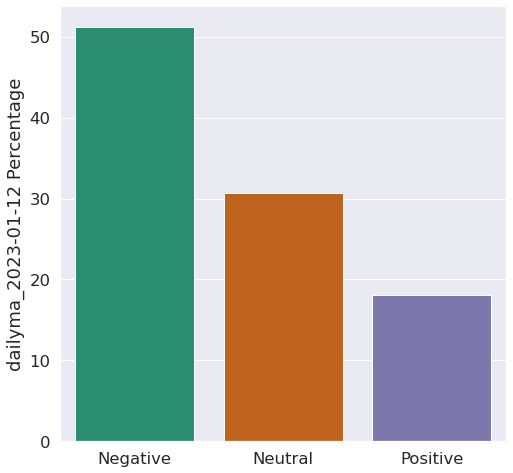

In [9]:
fig, ax = plt.subplots(figsize=(8, 8)) #create a bar graph of sentiment distributions

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel(filename[0:18] + " Percentage")

# plt.savefig(filename + ".png") #uncomment to safe plot image
plt.show()


In [10]:
textblob_sentiment=[]
for s in saved_text:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [11]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [12]:
df_textblob

,Sentence,Polarity,Subjectivity
0,Man who asked year olds to share life advic...,0.125000,0.275000
1,Newly released bodycam footage shows the momen...,0.068182,0.227273
2,Woke Golden Globes plummets in the ratings to ...,0.300000,0.500000
3,Glitches and complications happen all the time...,0.000000,0.000000
4,The SIX MINUTE daily exercise that might be en...,0.000000,0.250000
...,...,...,...
122,Fired female Tennessee cop who had sex with he...,0.000000,0.333333
123,Shrink wrapped Kelsey Grammer s Frasier reboo...,0.050000,0.250000
124,Massachusetts Minnesota and New York are the ...,-0.165909,0.663636
125,TikTok star Remi Bader reveals how she gained ...,0.309091,0.588636


In [13]:
df_textblob.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      127 non-null    object 
 1   Polarity      127 non-null    float64
 2   Subjectivity  127 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Text(0.5, 15.440000000000012, 'Sentence Polarity (Textblob)')

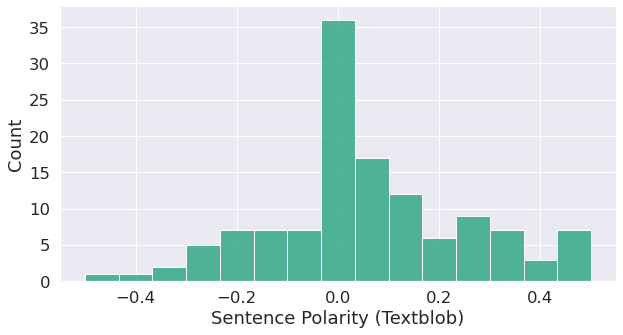

In [14]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 15.440000000000012, 'Sentence Subjectivity (Textblob)')

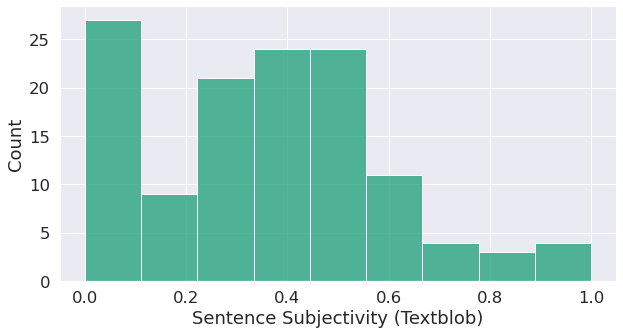

In [15]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [16]:
from nltk.tokenize import word_tokenize, RegexpTokenizer #tokenize and remove stop words from corpus
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def process_text(headlines):
    sent_tokens = []
    for headline in headlines:
        head_tokens = word_tokenize(headline)
        head_tokens = [t.lower() for t in head_tokens if t.lower() not in stop_words]
        sent_tokens.extend(head_tokens)
    return sent_tokens


In [17]:
pos_lines = list(df[df.label == 1].Headline)

pos_tokens = process_text(pos_lines)

longPosTokens = [i for i in pos_tokens if len(i)> 1]
pos_freq = nltk.FreqDist(longPosTokens)


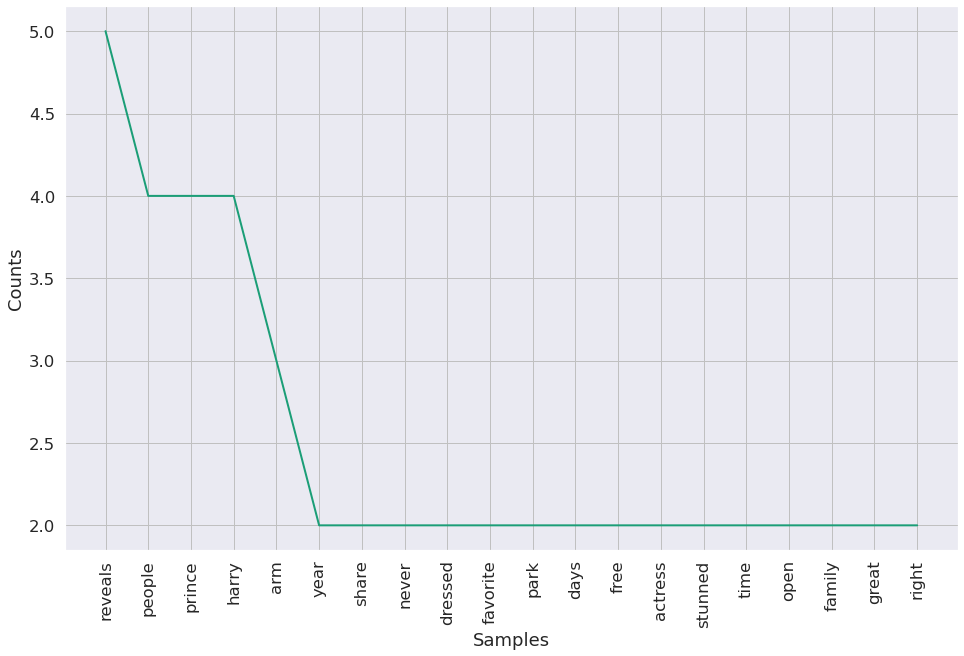

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
freq_dist = nltk.FreqDist(pos_freq)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))

freq_dist.plot(20)

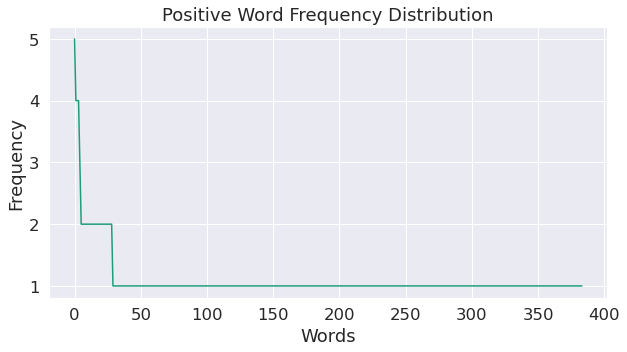

In [19]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Positive Word Frequency Distribution")
plt.show()

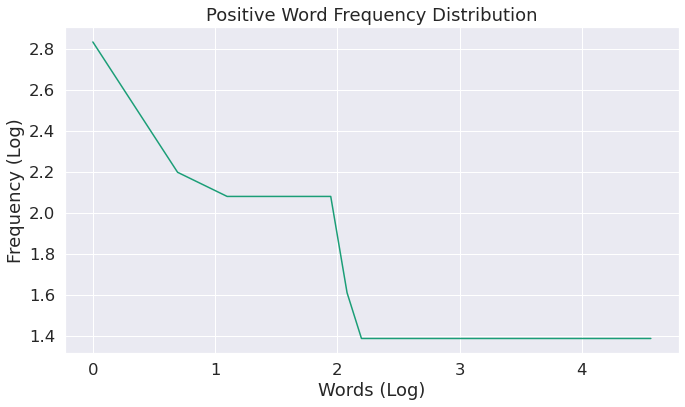

In [20]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(11,6))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Positive Word Frequency Distribution")
plt.plot(x_val, y_final)
plt.show()

In [21]:
neg_lines = list(df2[df2.label == -1].Headline)

neg_tokens = process_text(neg_lines)

longNegTokens = [i for i in neg_tokens if len(i)> 1]
neg_freq = nltk.FreqDist(longNegTokens)




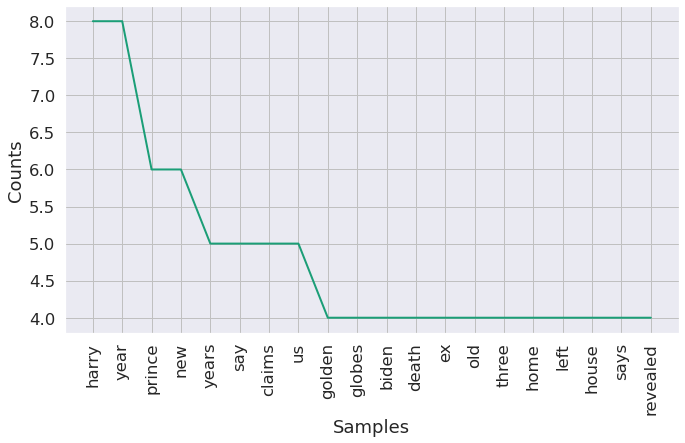

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
freq_dist = nltk.FreqDist(neg_freq)
#Frequency Distribution Plot
plt.subplots(figsize=(11,6))
freq_dist.plot(20)

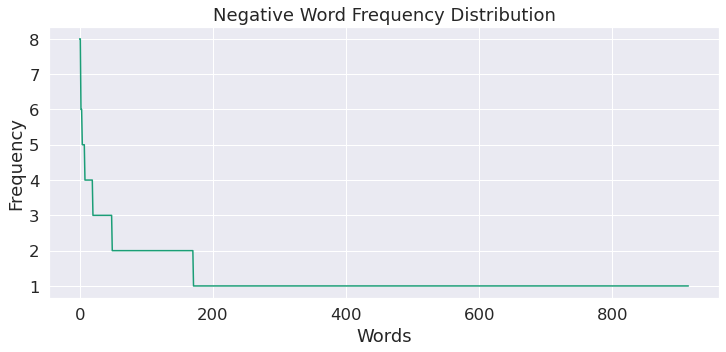

In [23]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(12,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Negative Word Frequency Distribution")
plt.show()

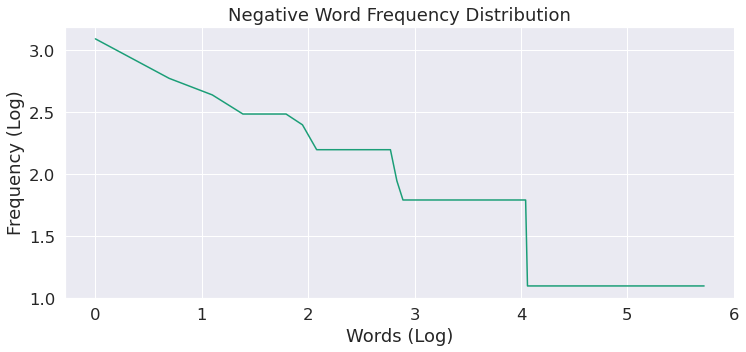

In [24]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(12,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Negative Word Frequency Distribution")
plt.plot(x_val, y_final)
plt.show()

In [25]:
from nltk.tokenize import word_tokenize, RegexpTokenizer #tokenize and remove stop words from corpus
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_tokens = []

def process_text(headlines):
    for line in headlines:
        toks = word_tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        stop_tokens.extend(toks)
    
    return stop_tokens

process_text(saved_text)


['man',
 'asked',
 'year',
 'olds',
 'share',
 'life',
 'advice',
 'people',
 'reveals',
 'poignant',
 'responses',
 'telling',
 'partner',
 'love',
 'bed',
 'giving',
 'people',
 'second',
 'chance',
 'never',
 'third',
 'newly',
 'released',
 'bodycam',
 'footage',
 'shows',
 'moment',
 'odell',
 'beckham',
 'jr',
 'woken',
 'cops',
 'american',
 'airlines',
 'flight',
 'cursing',
 'fellow',
 'passenger',
 'escorted',
 'plane',
 'woke',
 'golden',
 'globes',
 'plummets',
 'ratings',
 'lowest',
 'ever',
 'audience',
 'falls',
 'viewers',
 'brand',
 'snoozefest',
 'politicized',
 'monologues',
 'glitches',
 'complications',
 'happen',
 'time',
 'pete',
 'buttigieg',
 'calls',
 'nationwide',
 'flight',
 'shutdown',
 'data',
 'point',
 'learn',
 'faces',
 'widespread',
 'criticism',
 'another',
 'transport',
 'crisis',
 'southwest',
 'debacle',
 'republicans',
 'demand',
 'answers',
 'six',
 'minute',
 'daily',
 'exercise',
 'might',
 'enough',
 'ward',
 'alzheimer',
 'republican',
 'pro

In [26]:
from nltk.stem import WordNetLemmatizer #Lemmatize the words with stopwords removed
ls = WordNetLemmatizer()
lem_tokens = []
for t in stop_tokens:
    lemma = ls.lemmatize(t) 
    if len(lemma) > 1: #remove random single charcters from lemmatizing
        lem_tokens.append(lemma)

In [27]:
#lem_tokens #uncomment to see ouput of stemmed tokens

In [28]:
from collections import Counter     #get the top 30 words to make a data frame
my_counter = Counter(lem_tokens)
# my_counter.most_common(25)

word_freq = pd.DataFrame(my_counter.most_common(30),
                             columns=['Words', 'count'])
word_freq

,Words,count
0,year,19
1,harry,16
2,new,15
3,say,13
4,time,11
5,prince,11
6,reveals,10
7,day,9
8,life,8
9,face,8


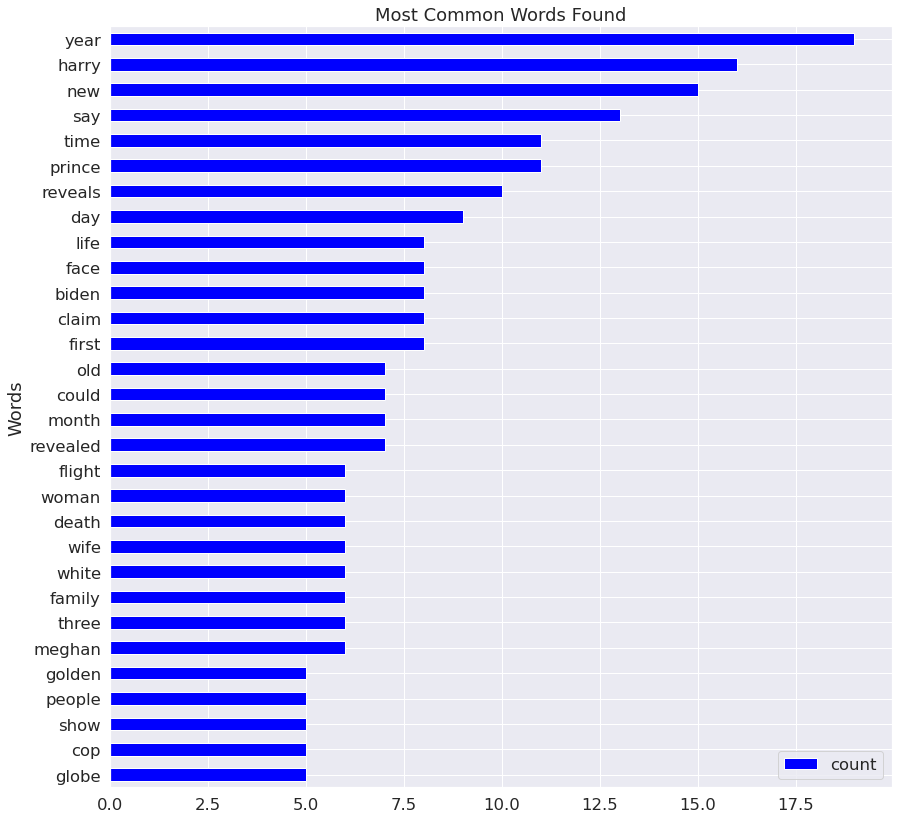

In [29]:
fig, ax = plt.subplots(figsize=(14, 14))  #make a bar graph ot the top 30 words from the data frame

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(
                                            x='Words',
                                            y='count',
                                            ax=ax,
                                            color="blue")
ax.set_title("Most Common Words Found")
plt.show()

In [30]:
guardian={-1:40.983607, 0:40.983607, 1:18.032787}
NYTimes = {-1:19.444444, 0:50.000000,  1:30.555556}
BBC = { -1:28.1690140, 0:57.746479,1:14.084507}
FoxNews = {-1:29.5180720, 0:40.361446, 1:30.120482}
NPR = { -1:31.25, 0:43.75, 1:25.00}
KPTV = {-1:63.333333, 0:23.333333, 1:13.333333}
DailyMail = {-1:56.730769, 0:19.230769, 1:24.038462}
NYPost = { -1:34.355828, 0:44.785276, 1:20.858896}
Oregonlive = {-1:28.947368, 0:46.052632, 1:25.000000}



          

[ WARN:0@161.402] global loadsave.cpp:244 findDecoder imread_('kptv.co_2023-01-09-0433_UTC.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

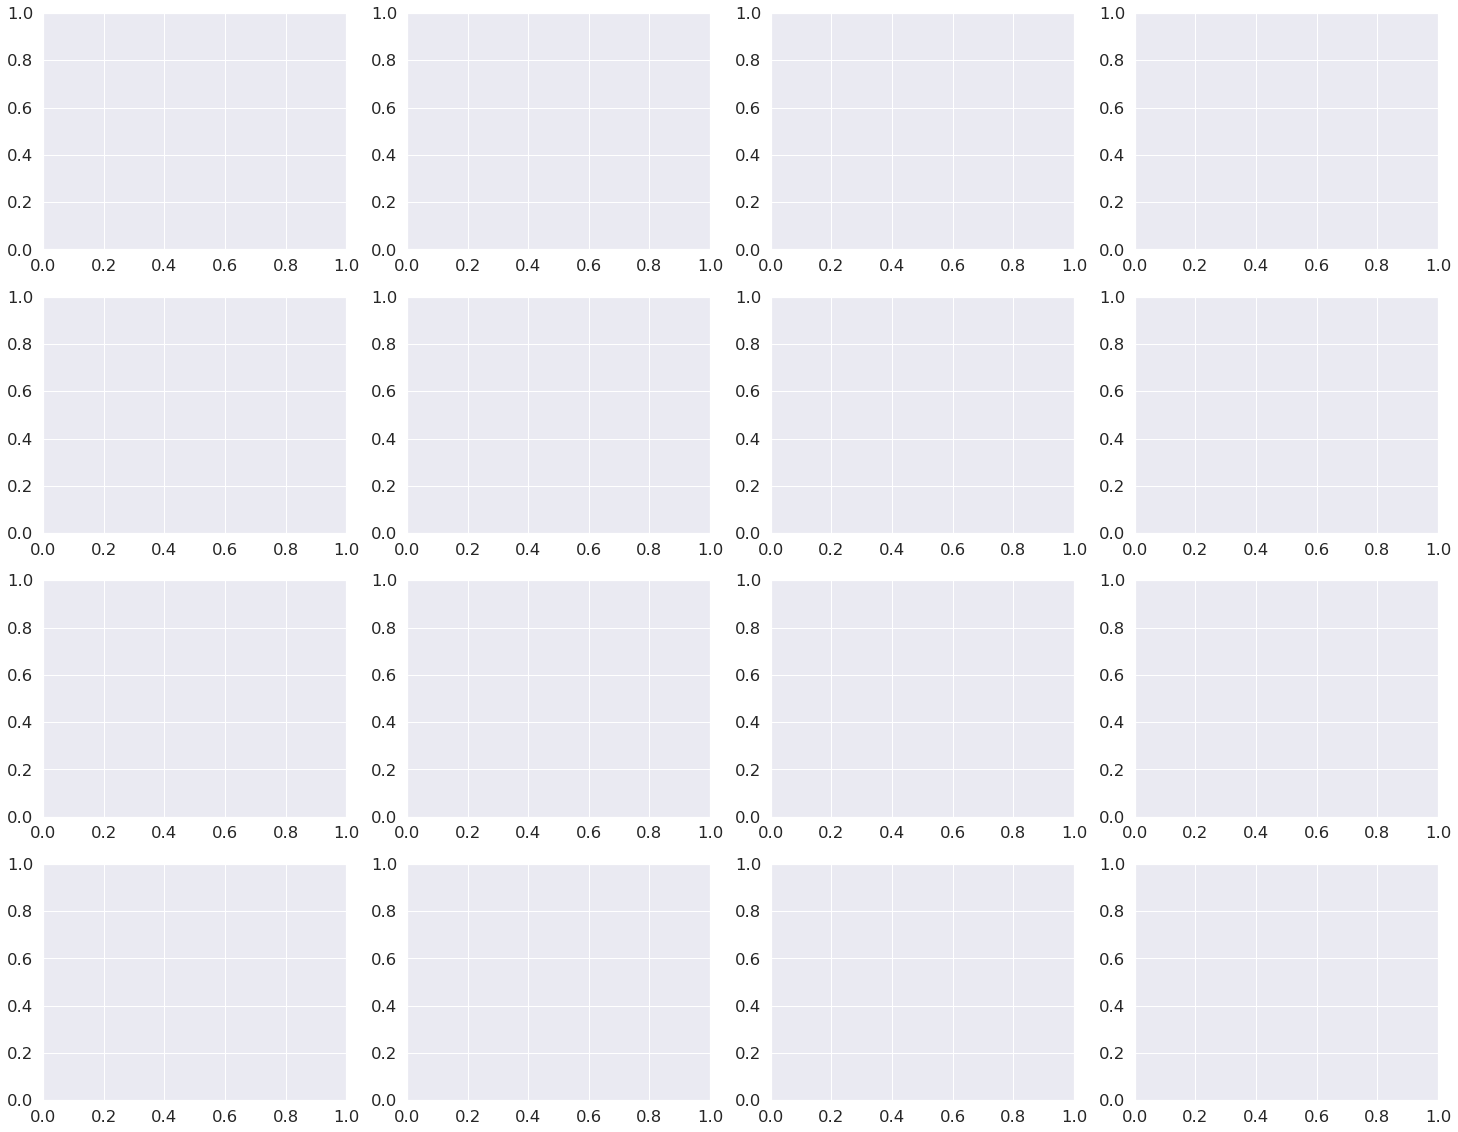

In [31]:
from matplotlib import pyplot
file_names = ['kptv.co_2023-01-09-0433_UTC.png',
              'dailyma_2023-01-09-0435_UTC.png',
              'st.com_2023-01-09-0441_UTC.png',
              'oregonl_2023-01-09-0446_UTC.png',
              'theguar_2023-01-09-0449_UTC.png',
              'nytimes_2023-01-09-0453_UTC.png',
              'bbc.com_2023-01-09-0457_UTC.png',
              'foxnews_2023-01-09-0501_UTC.png',
              'npr.org_2023-01-09-0504_UTC.png']
# create subplots instances
fig, axes = pyplot.subplots(4,4, figsize=(25,20))

for name, ax in zip(file_names, axes.ravel()):
    image = cv2.imread(name)

    # plot image into the subplot
    ax.imshow(image[:,:,::-1])

In [32]:
import cv2

# create figure
fig = plt.figure(figsize=(30,30))
 
# reading images
Image1 = cv2.imread('kptv.co_2023-01-09-0433_UTC.png')
             
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1[:,:,::-1])
plt.axis('off')
plt.title("KPTV")
 

[ WARN:0@181.930] global loadsave.cpp:244 findDecoder imread_('kptv.co_2023-01-09-0433_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [33]:
Image2 = cv2.imread('dailyma_2023-01-09-0435_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image2[:,:,::-1])
plt.axis('off')
plt.title("Daily Mail")

[ WARN:0@182.958] global loadsave.cpp:244 findDecoder imread_('dailyma_2023-01-09-0435_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [34]:
Image3 = cv2.imread('st.com_2023-01-09-0441_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image3[:,:,::-1])
plt.axis('off')
plt.title("NY Post")

[ WARN:0@184.161] global loadsave.cpp:244 findDecoder imread_('st.com_2023-01-09-0441_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [35]:
Image4 = cv2.imread('oregonl_2023-01-09-0446_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image4[:,:,::-1])
plt.axis('off')
plt.title("Oregonlive")

[ WARN:0@184.904] global loadsave.cpp:244 findDecoder imread_('oregonl_2023-01-09-0446_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [36]:
Image5 = cv2.imread('theguar_2023-01-09-0449_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image5[:,:,::-1])
plt.axis('off')
plt.title("The Guardian")

[ WARN:0@185.380] global loadsave.cpp:244 findDecoder imread_('theguar_2023-01-09-0449_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [37]:
Image6 = cv2.imread('nytimes_2023-01-09-0453_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image6[:,:,::-1])
plt.axis('off')
plt.title("NY Times")

[ WARN:0@185.887] global loadsave.cpp:244 findDecoder imread_('nytimes_2023-01-09-0453_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [38]:
Image7 = cv2.imread('bbc.com_2023-01-09-0457_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image7[:,:,::-1])
plt.axis('off')
plt.title("BBC")

[ WARN:0@186.391] global loadsave.cpp:244 findDecoder imread_('bbc.com_2023-01-09-0457_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [39]:
Image8 = cv2.imread('foxnews_2023-01-09-0501_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image8[:,:,::-1])
plt.axis('off')
plt.title("Fox News")

[ WARN:0@186.911] global loadsave.cpp:244 findDecoder imread_('foxnews_2023-01-09-0501_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [40]:
Image9 = cv2.imread('npr.org_2023-01-09-0504_UTC.png')

# create figure
fig = plt.figure(figsize=(30,30))
                    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image9[:,:,::-1])
plt.axis('off')
plt.title("NPR")

[ WARN:0@187.499] global loadsave.cpp:244 findDecoder imread_('npr.org_2023-01-09-0504_UTC.png'): can't open/read file: check file path/integrity


NameError: name 'rows' is not defined

<Figure size 2160x2160 with 0 Axes>

In [41]:
data = {"Guardian":{-1:40.983607, 0:40.983607, 1:18.032787},"NYTimes":{-1:19.444444, 0:50.000000,  1:30.555556}, "BBC":{ -1:28.1690140, 0:57.746479,1:14.084507}, "FoxNews":{-1:29.5180720, 0:40.361446, 1:30.120482},"NPR":{ -1:31.25, 0:43.75, 1:25.00},"KPTV":{-1:63.333333, 0:23.333333, 1:13.333333}, "DailyMail":{-1:56.730769, 0:19.230769, 1:24.038462}, "NYPost":{ -1:34.355828, 0:44.785276, 1:20.858896}, "Oregonlive":{-1:28.947368, 0:46.052632, 1:25.000000}}

data

{'Guardian': {-1: 40.983607, 0: 40.983607, 1: 18.032787},
 'NYTimes': {-1: 19.444444, 0: 50.0, 1: 30.555556},
 'BBC': {-1: 28.169014, 0: 57.746479, 1: 14.084507},
 'FoxNews': {-1: 29.518072, 0: 40.361446, 1: 30.120482},
 'NPR': {-1: 31.25, 0: 43.75, 1: 25.0},
 'KPTV': {-1: 63.333333, 0: 23.333333, 1: 13.333333},
 'DailyMail': {-1: 56.730769, 0: 19.230769, 1: 24.038462},
 'NYPost': {-1: 34.355828, 0: 44.785276, 1: 20.858896},
 'Oregonlive': {-1: 28.947368, 0: 46.052632, 1: 25.0}}

In [42]:
data_words = {"Guardian":{"Negative":40.983607, "Neutral":40.983607, "Positive":18.032787},"NYTimes":{"Negative":19.444444, "Neutral":50.000000, "Positive":30.555556}, "BBC":{ "Negative":28.1690140, "Neutral":57.746479,"Positive":14.084507}, "FoxNews":{"Negative":29.5180720, "Neutral":40.361446, "Positive":30.120482},"NPR":{ "Negative":31.25, "Neutral":43.75, "Positive":25.00},"KPTV":{"Negative":63.333333, "Neutral":23.333333, "Positive":13.333333}, "DailyMail":{"Negative":56.730769, "Neutral":19.230769, "Positive":24.038462}, "NYPost":{ "Negative":34.355828, "Neutral":44.785276, "Positive":20.858896}, "Oregonlive":{"Negative":28.947368, "Neutral":46.052632, "Positive":25.000000}}


Text(0, 0.5, 'Word Frequency by Type')

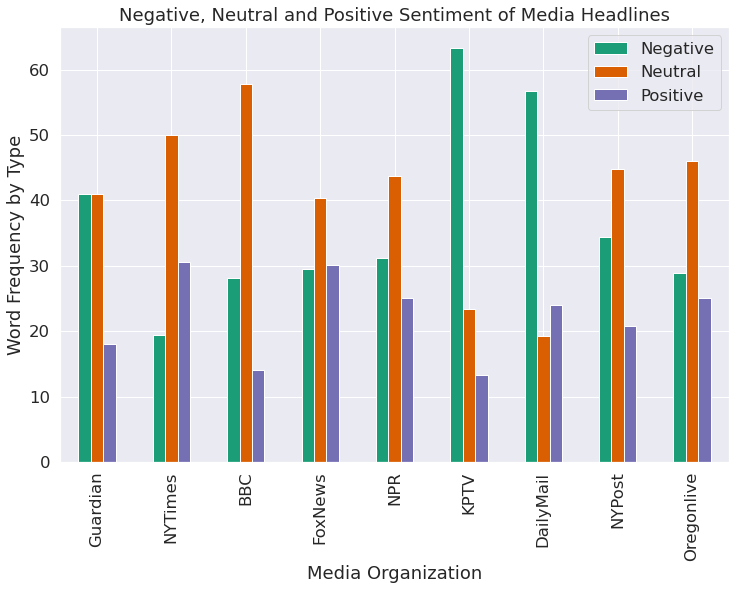

In [43]:
df = pd.DataFrame(data_words).T



df.plot(kind="bar", figsize=(12, 8))
plt.title("Negative, Neutral and Positive Sentiment of Media Headlines")
plt.xlabel("Media Organization")
plt.ylabel("Word Frequency by Type")

**Summary:**
The data clearly demonstrates that overall, the analyzed online news media organizations exhibited a negative bias in their headlines.  Only two news media organizations, the New York Times and Fox News,  had a greater positive score than negative. Fox News’s negative score was within 1 point of its positive score which may be within the margin of error. The news media organization KPTV Fox 12 exhibited the highest bias score of approximately 63 negative words  versus approximately 13 positive words. The Daily Mail’s negative sentiment score was nearly double that of its positive score. Please see the data for additional details. 

**Works Cited**

Hutto, C., and Eric Gilbert. “VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text.” Proceedings of the International AAAI Conference on Web and Social Media, vol. 8, no. 1, 16 May 2014, ojs.aaai.org/index.php/ICWSM/article/view/14550.

Kathirvel, Natarajan. “Post COVID-19 Pandemic Mental Health Challenges.” Asian Journal of Psychiatry, vol. 53, Oct. 2020, p. 102430, www.ncbi.nlm.nih.gov/pmc/articles/PMC7507979/, 10.1016/j.ajp.2020.102430.

Lindberg, Sara. “Is Watching the News Bad for Mental Health?” Verywell Mind, 18 May 2020, www.verywellmind.com/is-watching-the-news-bad-for-mental-health-4802320.

Soroka, Stuart, et al. “Cross-National Evidence of a Negativity Bias in Psychophysiological 	Reactions to News.” Proceedings of the National Academy of Sciences, vol. 116, no. 38, 3 Sept. 2019, pp. 18888–18892, www.pnas.org/content/116/38/18888, 10.1073/pnas.1908369116.